In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Deskripsi dataset:
- state_code: Kode state startup
- latitude: Posisi latitude startup
- longitude: Posisi longitude startup
- founded_at: Tanggal ketika startup tersebut didirikan
- age_first_funding_year: Umur startup dalam tahun ketika pertama kali mendapatkan funding
- age_last_funding_year: Umur startup dalam tahun ketika terakhir kali mendapatkan funding
- funding_rounds: Banyaknya funding yang diterima oleh startup
- funding_total_usd: Jumlah funding yang diterima oleh startup dalam USD
- category_code: Bidang yang menjadi fokus dari startup
- has_VC: Apakah startup tersebut memiliki venture capital
- has_angel: Apakah startup tersebut memiliki angel investor
- has_seriesA: Apakah startup tersebut mendapatkan funding series A
- has_seriesB: Apakah startup tersebut mendapatkan funding series B
- has_seriesC: Apakah startup tersebut mendapatkan funding series C
- has_seriesD: Apakah startup tersebut mendapatkan funding series D
- avg_participants: Rata-rata banyak pengguna dari startup tersebut dalam juta
- is_top500: Apakah startup tersebut pernah masuk ke dalam 500 startup dengan peringkat teratas di Amerika
- status (target): Status dari startup tersebut sekarang, acquired berarti startup tersebut berhasil karena diakusisi oleh organisasi lain, sebaliknya, closed berarti startup tersebut sudah berhenti beroperasi dan gagal


**Pada tugas ini, pemrosesan data dilakukan dengan tujuan lebih lanjut untuk memprediksi `status` dari suatu startup.**

In [ ]:
# Membaca data

startups = pd.read_csv("startup_data.csv")

print("Data has size:", startups.shape)
startups.head()

Data has size: (949, 18)


,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,1/1/2007,2.2493,3.0027,3.0,375000,music,No,Yes,No,No,No,No,1.0000,No,acquired
1,CA,37.238916,-121.973718,1/1/2000,5.1260,9.9973,4.0,40100000,enterprise,Yes,No,No,Yes,Yes,Yes,4.7500,Yes,acquired
2,CA,32.901049,-117.192656,3/18/2009,1.0329,1.0329,1.0,-2600000,web,No,No,Yes,No,No,No,4.0000,Yes,acquired
3,CA,37.320309,-122.050040,1/1/2002,3.1315,5.3151,3.0,40000000,software,No,No,No,Yes,Yes,Yes,3.3333,Yes,acquired
4,CA,37.779281,-122.419236,8/1/2010,NaN,1.6685,2.0,1300000,games_video,Yes,Yes,No,No,No,No,1.0000,Yes,closed


# Basic Summary

In [ ]:
# Mengecek info pada setiap kolom
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_code              949 non-null    object 
 1   latitude                949 non-null    float64
 2   longitude               949 non-null    float64
 3   founded_at              949 non-null    object 
 4   age_first_funding_year  885 non-null    float64
 5   age_last_funding_year   894 non-null    float64
 6   funding_rounds          946 non-null    float64
 7   funding_total_usd       949 non-null    int64  
 8   category_code           897 non-null    object 
 9   has_VC                  949 non-null    object 
 10  has_angel               949 non-null    object 
 11  has_seriesA             949 non-null    object 
 12  has_seriesB             949 non-null    object 
 13  has_seriesC             949 non-null    object 
 14  has_seriesD             949 non-null    ob

In [ ]:
# Melihat deskripsi statistik dari kelompok fitur numerik
startups.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,avg_participants
count,949.000000,949.000000,885.000000,894.000000,946.000000,9.490000e+02,901.000000
mean,38.530398,-103.465916,2.322209,3.987377,2.313953,1.544590e+09,2.857545
std,3.756150,22.382011,2.941926,3.313172,1.402098,2.446676e+10,1.875341
min,25.752358,-122.756956,-9.046600,-9.046600,1.000000,-9.500000e+06,1.000000
25%,37.388869,-122.200914,0.517800,1.690375,1.000000,2.700000e+06,1.500000
50%,37.779281,-118.354605,1.424700,3.494500,2.000000,1.000000e+07,2.500000
75%,40.730646,-77.212493,3.602700,5.543150,3.000000,2.490000e+07,4.000000
max,59.335232,18.057121,34.490400,34.490400,10.000000,6.423100e+11,16.000000


In [ ]:
# Melihat deskripsi statistik dari kelompok fitur kategorik
display(startups.describe(include=np.object))

,state_code,founded_at,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,is_top500,status
count,949,949,897,949,949,949,949,949,949,949,949
unique,35,219,35,2,2,2,2,2,2,2,2
top,CA,1/1/2003,web,No,No,Yes,No,No,No,Yes,acquired
freq,499,57,142,637,704,479,577,730,855,769,610


# Visualisasi

In [ ]:
# Fungsi yang digunakan untuk memvisualisasikan distribusi frekuensi pada kolom kategorik
def countplot(df, column):
    return sns.countplot(x= column, data= df)

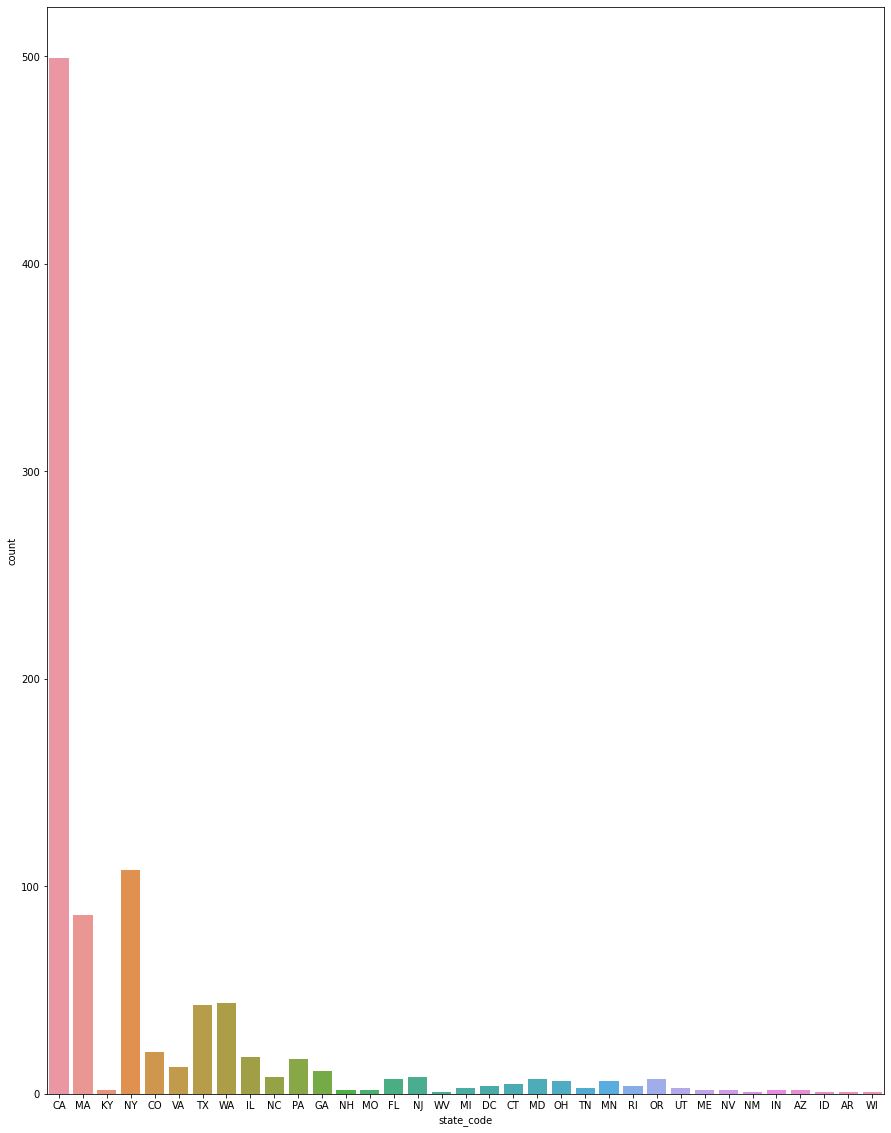

In [ ]:
plt.figure(figsize=(15,20))
countplot(startups, 'state_code')

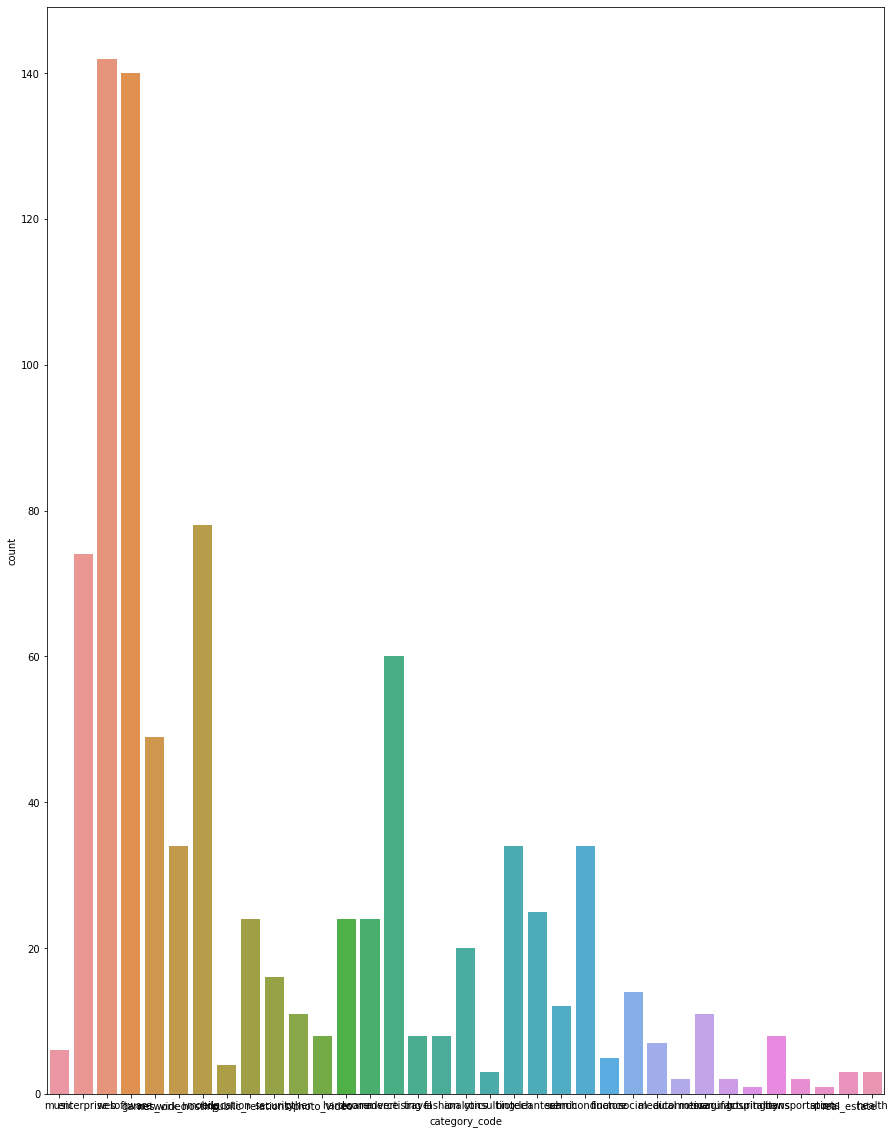

In [ ]:
plt.figure(figsize=(15,20))
countplot(startups, 'category_code')

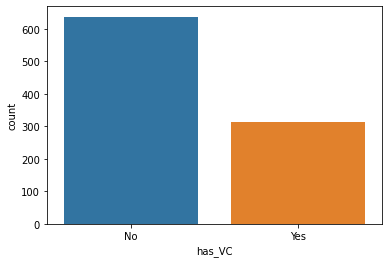

In [ ]:
countplot(startups, 'has_VC')

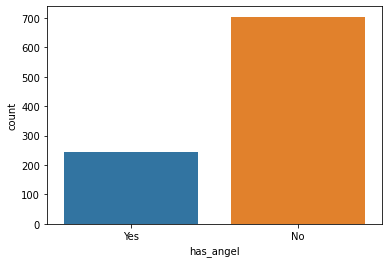

In [ ]:
countplot(startups, 'has_angel')

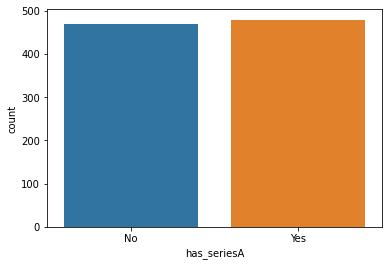

In [ ]:
countplot(startups, 'has_seriesA')

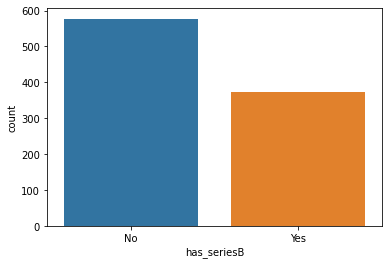

In [ ]:
countplot(startups, 'has_seriesB')

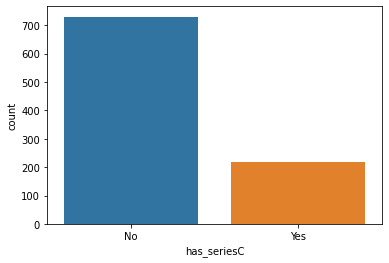

In [ ]:
countplot(startups, 'has_seriesC')

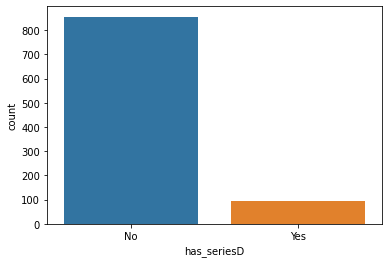

In [ ]:
countplot(startups, 'has_seriesD')

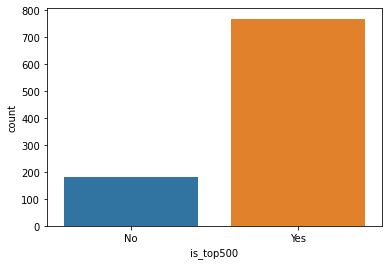

In [ ]:
countplot(startups, 'is_top500')

Sebelum melakukan visualisasi terkait hubungan fitur dengan atribut target yaitu `status`, kita encode dulu atribut-atribut kategorik yang berbentuk Yes/No menjadi angka 1 (apabila `Yes`) dan 0 (apabila `No`). Kemudian kita encode juga atribut target `status` menjadi angka 1 (apabila `acquired`) dan 0 (apabila `closed`).

In [ ]:
attributes = ['has_VC', 'has_angel', 'has_seriesA', 'has_seriesB', 'has_seriesC', 'has_seriesD', 'is_top500']
for attr in attributes:
  startups[attr] = [1 if val == 'Yes' else 0 for val in startups[attr]]

startups['status'] = [1 if val == 'acquired' else 0 for val in startups['status']]

display(startups)

,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,1/1/2007,2.2493,3.0027,3.0,375000,music,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,1/1/2000,5.1260,9.9973,4.0,40100000,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,3/18/2009,1.0329,1.0329,1.0,-2600000,web,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,1/1/2002,3.1315,5.3151,3.0,40000000,software,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,8/1/2010,NaN,1.6685,2.0,1300000,games_video,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,NY,40.606061,-73.822331,1/1/2006,0.6658,3.0384,3.0,17200000,games_video,0,0,1,1,1,0,2.6667,1,1
945,MA,42.375100,-71.105616,8/1/2008,-0.5836,1.3425,7.0,457282,mobile,1,1,0,0,0,0,1.0000,1,0
946,CA,37.779281,-122.419236,9/9/2010,-0.0219,2.0329,4.0,18500000,mobile,0,1,1,1,0,0,2.2500,1,1
947,NJ,40.349274,-74.659296,1/1/2008,2.0466,2.0466,1.0,12000000,cleantech,0,0,1,0,0,0,6.0000,1,0


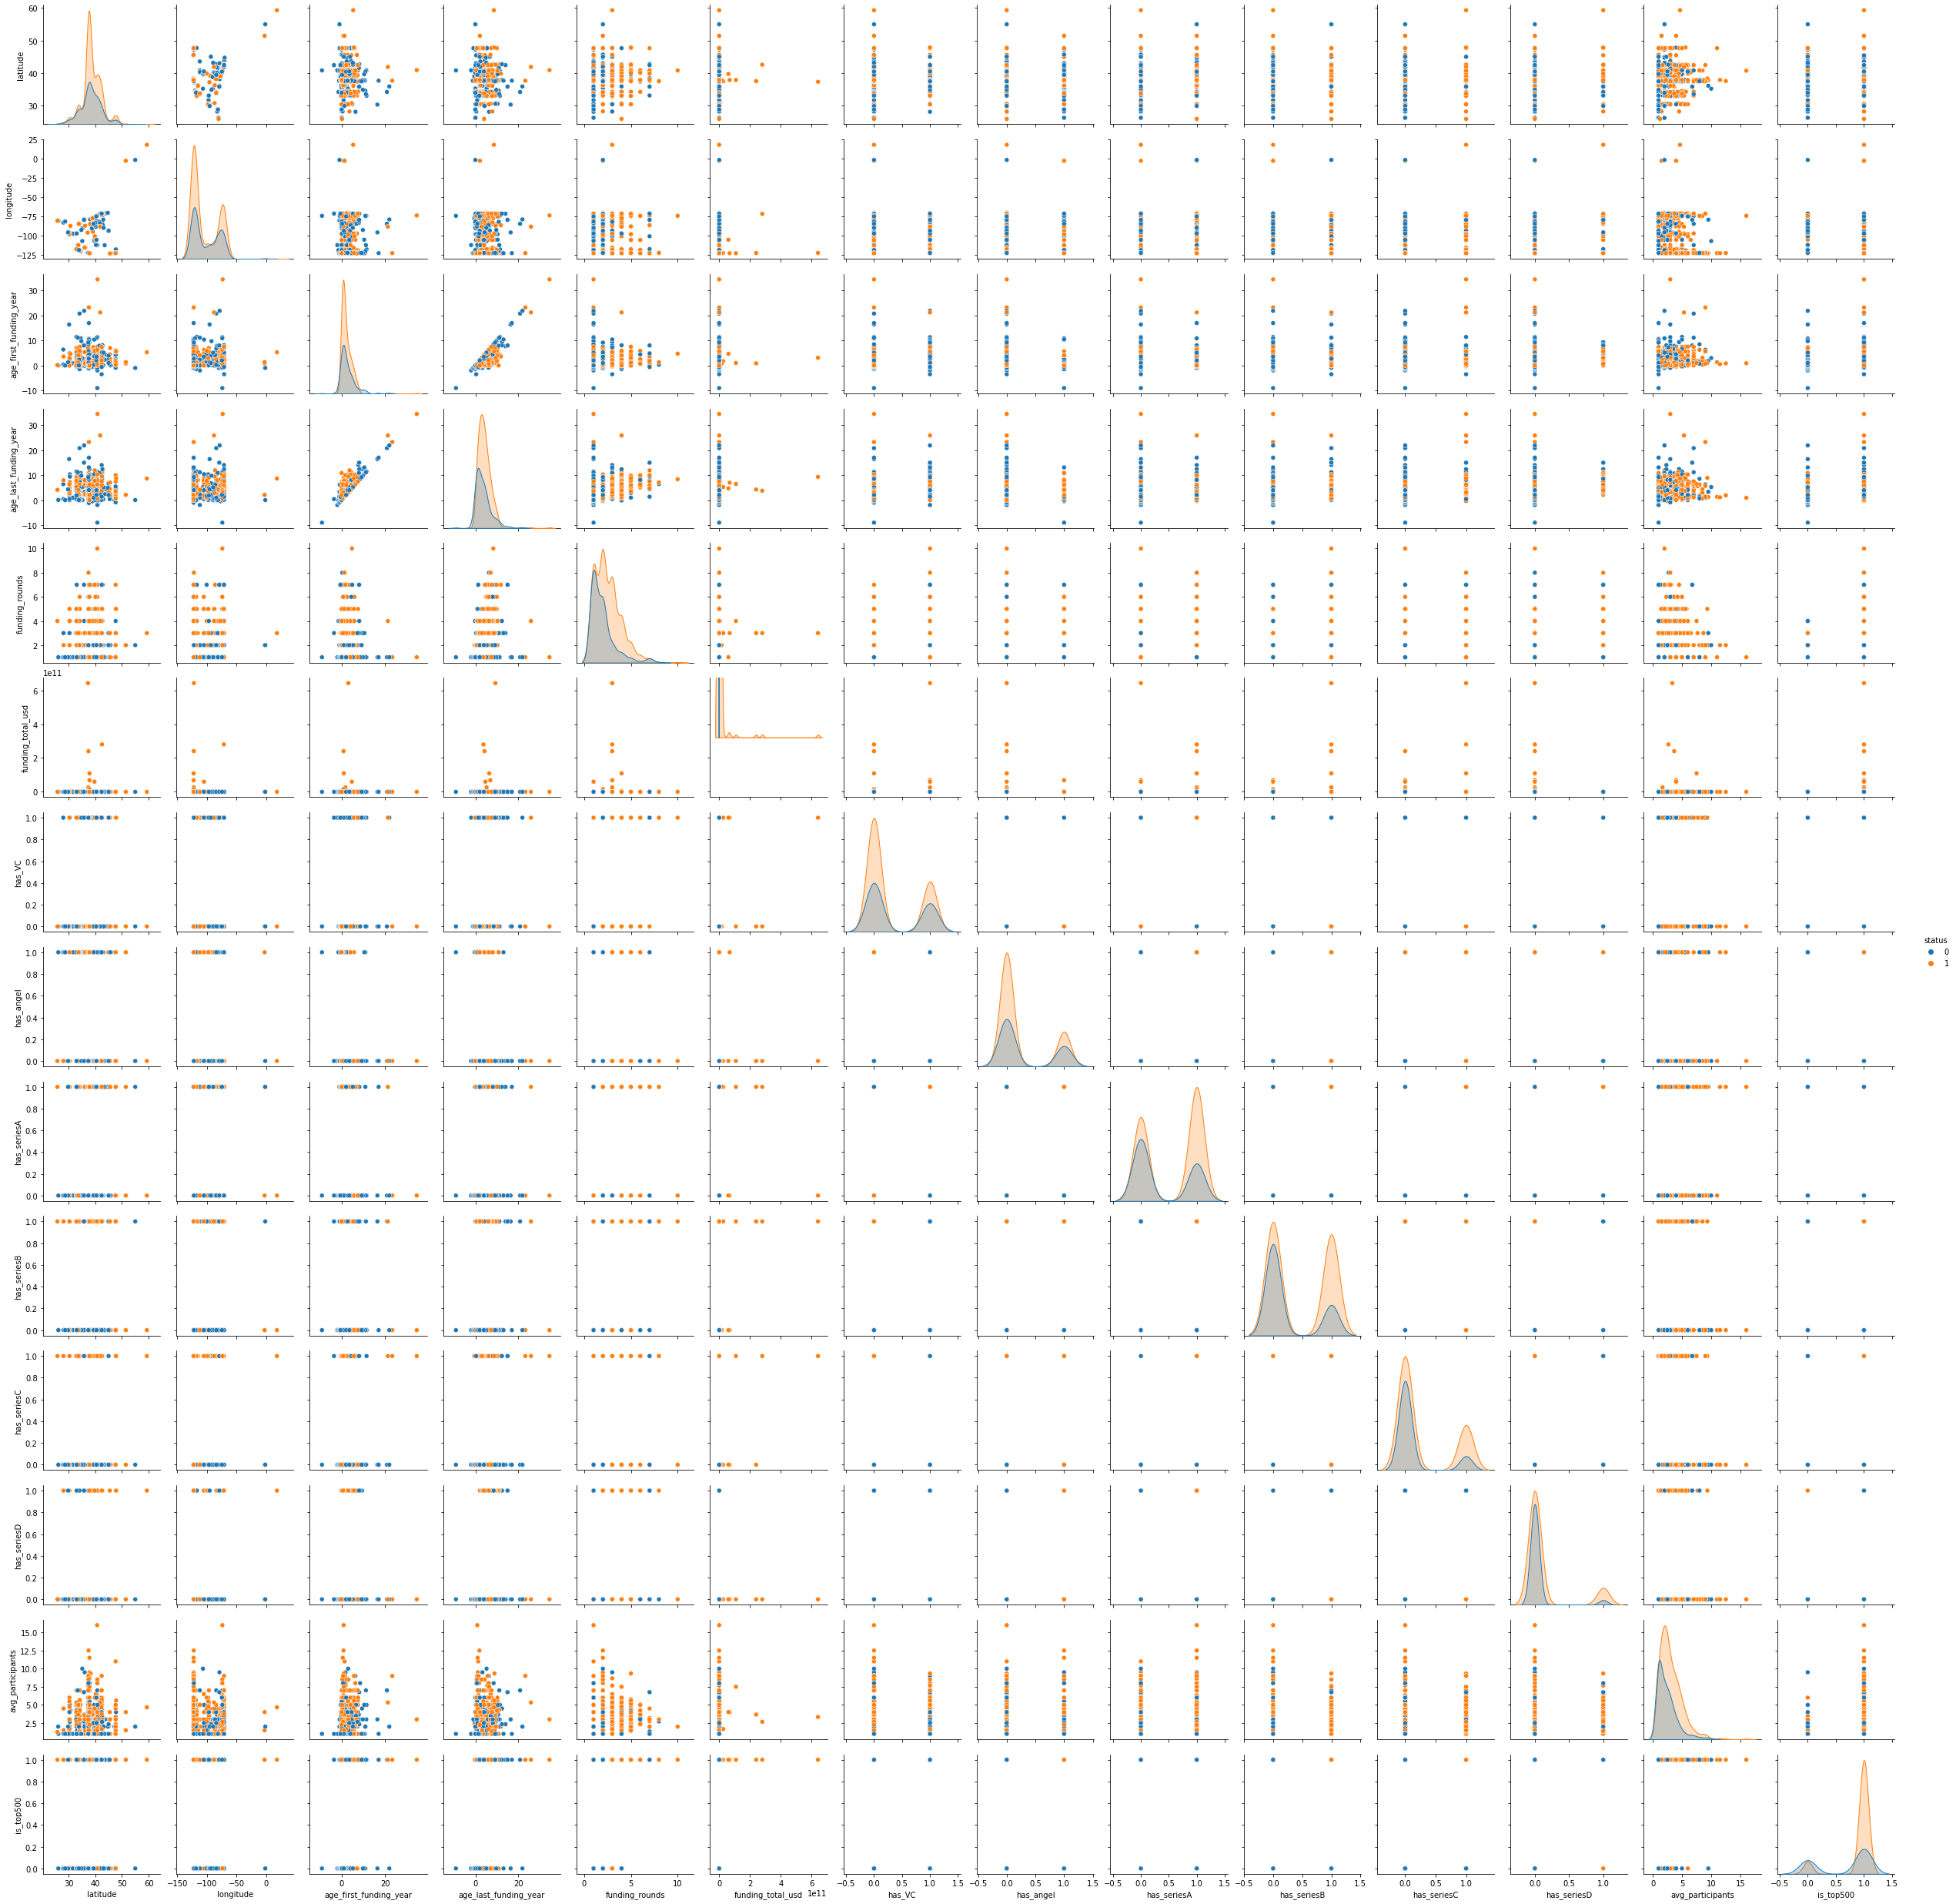

In [ ]:
# Visualisasi pairplot dari setiap pasang fitur numerik
sns.pairplot(startups.select_dtypes(np.number), hue='status')

Dari visualisasi data numerik dapat kita lihat bahwa hampir semua fitur/kolom tidak berkorelasi dengan `status`.

Text(0.5, 1.0, 'Correlation matrix')

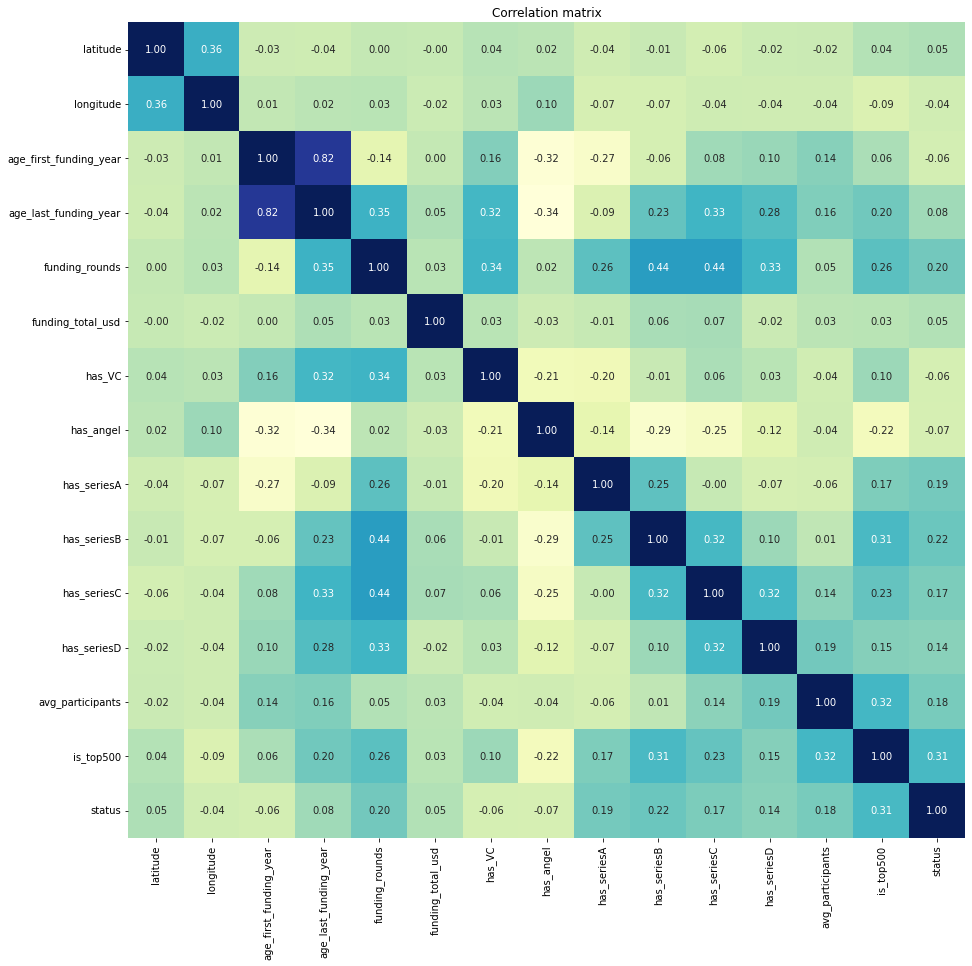

In [ ]:
# Visualisasi matriks korelasi dari setiap fitur numerik
plt.figure(figsize=(15,15))

sns.heatmap(startups.select_dtypes(np.number).corr(), 
        annot=True,
        cbar = False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=startups.select_dtypes(np.number).columns,
        yticklabels=startups.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

Dari nilai korelasi, terbukti bahwa semua atribut numerik tidak mempengaruhi atribut target kita yaitu `status`. 

# Data Preprocessing

Pra-pemrosesan data dilakukan dengan tujuan melakukan prediksi `status` dengan salah satu jenis dimensionality reduction, yaitu PCA. Fitur yang akan digunakan hanyalah fitur numerik dan normalisasi perlu dilakukan karena fitur-fitur yang tidak dalam skala sama.

Sebelum kita mulai menangani duplikasi data, *missing values*, *outliers*, dll, perhatikan bahwa pada hasil `describe` dari dataset, fitur `age_first_funding_year`, `age_last_funding_year`, `funding_total_usd` memiliki nilai minimum yang merupakan nilai negatif. Sedangkan, nilai-nilai fitur tersebut seharusnya tidak boleh negatif. Di sini boleh kita asumsikan bahwa terdapat kesalahan input dan kita buat menjadi positif untuk setiap value yang bernilai negatif pada fitur-fitur tersebut.

In [ ]:
attributes = ['age_first_funding_year', 'age_last_funding_year', 'funding_total_usd']
for attr in attributes:
  startups[attr] = abs(startups[attr])

display(startups)

,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,1/1/2007,2.2493,3.0027,3.0,375000,music,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,1/1/2000,5.1260,9.9973,4.0,40100000,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,3/18/2009,1.0329,1.0329,1.0,2600000,web,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,1/1/2002,3.1315,5.3151,3.0,40000000,software,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,8/1/2010,NaN,1.6685,2.0,1300000,games_video,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,NY,40.606061,-73.822331,1/1/2006,0.6658,3.0384,3.0,17200000,games_video,0,0,1,1,1,0,2.6667,1,1
945,MA,42.375100,-71.105616,8/1/2008,0.5836,1.3425,7.0,457282,mobile,1,1,0,0,0,0,1.0000,1,0
946,CA,37.779281,-122.419236,9/9/2010,0.0219,2.0329,4.0,18500000,mobile,0,1,1,1,0,0,2.2500,1,1
947,NJ,40.349274,-74.659296,1/1/2008,2.0466,2.0466,1.0,12000000,cleantech,0,0,1,0,0,0,6.0000,1,0


## Menangani duplikasi data

In [ ]:
# Cek banyaknya duplikasi data

startups.duplicated(keep=False).sum()

52

In [ ]:
# Melakukan drop pada row yang merupakan duplikat dari suatu row lainnya

no_duplicate_startups = startups.drop_duplicates()
display(no_duplicate_startups)

,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,1/1/2007,2.2493,3.0027,3.0,375000,music,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,1/1/2000,5.1260,9.9973,4.0,40100000,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,3/18/2009,1.0329,1.0329,1.0,2600000,web,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,1/1/2002,3.1315,5.3151,3.0,40000000,software,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,8/1/2010,NaN,1.6685,2.0,1300000,games_video,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,1/1/2009,0.5178,0.5178,1.0,1100000,advertising,0,0,1,0,0,0,6.0000,1,1
919,MA,42.504817,-71.195611,1/1/1998,7.2521,NaN,3.0,52000000,security,1,0,0,1,0,0,2.6667,1,0
920,CA,37.408261,-122.015920,1/1/1999,8.4959,8.4959,1.0,44000000,NaN,0,0,0,0,0,1,8.0000,1,0
921,CA,37.556732,-122.288378,1/1/2009,0.7589,2.8329,2.0,15500000,software,0,0,1,1,0,0,1.0000,1,1


## Menangani *missing values*

In [ ]:
# Fungsi digunakan untuk mengecek persentase missing values pada dataframe
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(no_duplicate_startups)

                        Total   Percent
age_first_funding_year     60  0.065005
age_last_funding_year      55  0.059588
category_code              48  0.052004
avg_participants           48  0.052004
funding_rounds              3  0.003250


In [ ]:
# Mengisi nilai age_first_funding_year, age_last_funding_year, avg_participants, dan funding_rounds dengan rata-rata

col = ["age_first_funding_year", "age_last_funding_year", "avg_participants", "funding_rounds"]
for c in col:
    mean = no_duplicate_startups[c].mean()
    no_duplicate_startups[c] = no_duplicate_startups[c].fillna(mean)

cek_null(no_duplicate_startups)

               Total   Percent
category_code     48  0.052004


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Mengisi nilai category_code dengan modus (value yang memiliki frekuensi tertinggi)

mode = no_duplicate_startups['category_code'].mode()
no_duplicate_startups['category_code'] = no_duplicate_startups['category_code'].fillna(mode[0])

cek_null(no_duplicate_startups)

Empty DataFrame
Columns: [Total, Percent]
Index: []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Menangani *outliers*

In [ ]:
# Fungsi digunakan untuk mengecek banyaknya outliers pada setiap fitur

def check_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  print("Total outliers: ")
  print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

In [ ]:
check_outliers(no_duplicate_startups)

Total outliers: 
age_first_funding_year     28
age_last_funding_year      24
avg_participants           41
category_code               0
founded_at                  0
funding_rounds             16
funding_total_usd          70
has_VC                      0
has_angel                   0
has_seriesA                 0
has_seriesB                 0
has_seriesC               215
has_seriesD                92
is_top500                 176
latitude                   78
longitude                   4
state_code                  0
status                      0
dtype: int64


Fitur `has_seriesC`, `has_seriesD`, dan `is_top500` adalah atribut kategorik yang hanya memiliki 2 kemungkinan value, yaitu 0 atau 1, sehingga kita tidak perlu terlalu memusingkan apabila terdapat "outlier" pada fitur ini.

Fitur `latitude` dan `longitude` menggambarkan posisi dari startup, sehingga kita tidak perlu terlalu juga memusingkan apabila terdapat "outlier" pada fitur ini.

Untuk atribut `age_first_funding_year`, `age_last_funding_year`, `avg_participants`, `funding_rounds`, dan `funding_total_usd`, akan kita hapus baris yang mengandung outlier pada salah satu fitur nya.

In [ ]:
def delete_outlier(dataframe):
  q1 = dataframe.quantile(0.25)
  q3 = dataframe.quantile(0.75)
  iqr = q3-q1
  return dataframe[~((dataframe < (q1 - 1.5*iqr)) |(dataframe > (q3 + 1.5*iqr))).any(axis=1)]

In [ ]:
no_outlier_startups = delete_outlier(no_duplicate_startups)

display(no_outlier_startups)

,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
2,CA,32.901049,-117.192656,3/18/2009,1.032900,1.032900,1.0,2600000,web,0,0,1,0,0,0,4.000000,1,1
4,CA,37.779281,-122.419236,8/1/2010,2.401783,1.668500,2.0,1300000,games_video,1,1,0,0,0,0,1.000000,1,0
5,CA,37.406914,-122.090370,1/1/2002,2.401783,4.545200,1.0,7500000,network_hosting,0,0,0,1,0,0,3.000000,1,0
9,CA,37.427235,-122.145783,6/1/2005,1.671200,4.684900,3.0,5750000,web,1,1,1,0,0,0,2.858646,1,1
10,CA,37.442988,-122.162413,11/15/2000,4.627400,9.449300,3.0,27500000,mobile,0,0,1,1,0,0,1.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,NY,40.742953,-73.984461,9/6/2006,0.000000,3.928800,3.0,18000000,advertising,1,0,1,1,0,0,2.333300,1,1
918,CA,37.740594,-122.376471,1/1/2009,0.517800,0.517800,1.0,1100000,advertising,0,0,1,0,0,0,6.000000,1,1
919,MA,42.504817,-71.195611,1/1/1998,7.252100,4.037503,3.0,52000000,security,1,0,0,1,0,0,2.666700,1,0
921,CA,37.556732,-122.288378,1/1/2009,0.758900,2.832900,2.0,15500000,software,0,0,1,1,0,0,1.000000,1,1


# Encode fitur kategorik

Sebelum kita melanjutkan untuk menyiapkan format data untuk PCA, ingat bahwa kita masih ada 3 fitur kategorik yang belum kita encode, yaitu `state_code`, `founded_at`, dan `category_code`. Untuk fitur `state_code`, `category_code` memiliki banyak kemungkinan value dan bukanlah merupakan tipe data ordinal, sehingga akan kita lakukan one-hot encoding. Karena distribusi value nya cukup beragam, maka untuk masing-masing fitur akan kita pilih 3 value dengan frekuensi tertinggi, kemudian sisanya akan dijadikan fitur `is_otherX`. Untuk fitur `founded_at` yang merupakan tanggal, kita akan gunakan rumus yang dapat "mengkonversi"kan tanggal tersebut menjadi angka.  

### One-hot encoding untuk `state_code` dan `category_code`

In [ ]:
# Mencari 3 value dengan frekuensi tertinggi untuk fitur state_code

no_outlier_startups['state_code'].value_counts()[0:3]

CA    230
NY     59
MA     37
Name: state_code, dtype: int64

In [ ]:
# Melakukan one-hot encoding untuk fitur state_code

encoded_startups = no_outlier_startups.copy()

# Inisialisasi dengan default value 0
encoded_startups['is_CA'] = 0
encoded_startups['is_NY'] = 0
encoded_startups['is_MA'] = 0
encoded_startups['is_other_state'] = 0
for index, row in encoded_startups.iterrows():
  if row['state_code'] == 'CA':
    encoded_startups.at[index, 'is_CA'] = 1
  elif row['state_code'] == 'NY':
    encoded_startups.at[index, 'is_NY'] = 1
  elif row['state_code'] == 'MA':
    encoded_startups.at[index, 'is_MA'] = 1
  else:
    encoded_startups.at[index, 'is_other_state'] = 1

display(encoded_startups)

,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status,is_CA,is_NY,is_MA,is_other_state
2,CA,32.901049,-117.192656,3/18/2009,1.032900,1.032900,1.0,2600000,web,0,0,1,0,0,0,4.000000,1,1,1,0,0,0
4,CA,37.779281,-122.419236,8/1/2010,2.401783,1.668500,2.0,1300000,games_video,1,1,0,0,0,0,1.000000,1,0,1,0,0,0
5,CA,37.406914,-122.090370,1/1/2002,2.401783,4.545200,1.0,7500000,network_hosting,0,0,0,1,0,0,3.000000,1,0,1,0,0,0
9,CA,37.427235,-122.145783,6/1/2005,1.671200,4.684900,3.0,5750000,web,1,1,1,0,0,0,2.858646,1,1,1,0,0,0
10,CA,37.442988,-122.162413,11/15/2000,4.627400,9.449300,3.0,27500000,mobile,0,0,1,1,0,0,1.000000,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,NY,40.742953,-73.984461,9/6/2006,0.000000,3.928800,3.0,18000000,advertising,1,0,1,1,0,0,2.333300,1,1,0,1,0,0
918,CA,37.740594,-122.376471,1/1/2009,0.517800,0.517800,1.0,1100000,advertising,0,0,1,0,0,0,6.000000,1,1,1,0,0,0
919,MA,42.504817,-71.195611,1/1/1998,7.252100,4.037503,3.0,52000000,security,1,0,0,1,0,0,2.666700,1,0,0,0,1,0
921,CA,37.556732,-122.288378,1/1/2009,0.758900,2.832900,2.0,15500000,software,0,0,1,1,0,0,1.000000,1,1,1,0,0,0


In [ ]:
# Mencari 3 value dengan frekuensi tertinggi untuk fitur category_code

encoded_startups['category_code'].value_counts()[0:3]

web         80
software    62
mobile      38
Name: category_code, dtype: int64

In [ ]:
# Melakukan one-hot encoding untuk fitur category_code

# Inisialisasi dengan default value 0
encoded_startups['is_web'] = 0
encoded_startups['is_software'] = 0
encoded_startups['is_mobile'] = 0
encoded_startups['is_other_category'] = 0
for index, row in encoded_startups.iterrows():
  if row['category_code'] == 'web':
    encoded_startups.at[index, 'is_web'] = 1
  elif row['category_code'] == 'software':
    encoded_startups.at[index, 'is_software'] = 1
  elif row['category_code'] == 'mobile':
    encoded_startups.at[index, 'is_mobile'] = 1
  else:
    encoded_startups.at[index, 'is_other_category'] = 1

display(encoded_startups)

,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status,is_CA,is_NY,is_MA,is_other_state,is_web,is_software,is_mobile,is_other_category
2,CA,32.901049,-117.192656,3/18/2009,1.032900,1.032900,1.0,2600000,web,0,0,1,0,0,0,4.000000,1,1,1,0,0,0,1,0,0,0
4,CA,37.779281,-122.419236,8/1/2010,2.401783,1.668500,2.0,1300000,games_video,1,1,0,0,0,0,1.000000,1,0,1,0,0,0,0,0,0,1
5,CA,37.406914,-122.090370,1/1/2002,2.401783,4.545200,1.0,7500000,network_hosting,0,0,0,1,0,0,3.000000,1,0,1,0,0,0,0,0,0,1
9,CA,37.427235,-122.145783,6/1/2005,1.671200,4.684900,3.0,5750000,web,1,1,1,0,0,0,2.858646,1,1,1,0,0,0,1,0,0,0
10,CA,37.442988,-122.162413,11/15/2000,4.627400,9.449300,3.0,27500000,mobile,0,0,1,1,0,0,1.000000,1,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,NY,40.742953,-73.984461,9/6/2006,0.000000,3.928800,3.0,18000000,advertising,1,0,1,1,0,0,2.333300,1,1,0,1,0,0,0,0,0,1
918,CA,37.740594,-122.376471,1/1/2009,0.517800,0.517800,1.0,1100000,advertising,0,0,1,0,0,0,6.000000,1,1,1,0,0,0,0,0,0,1
919,MA,42.504817,-71.195611,1/1/1998,7.252100,4.037503,3.0,52000000,security,1,0,0,1,0,0,2.666700,1,0,0,0,1,0,0,0,0,1
921,CA,37.556732,-122.288378,1/1/2009,0.758900,2.832900,2.0,15500000,software,0,0,1,1,0,0,1.000000,1,1,1,0,0,0,0,1,0,0


Karena kita sudah berhasil melakukan *encoding* untuk fitur `state_code` dan `category_code`, maka kita bisa melakukan drop column pada fitur tersebut.

In [ ]:
# Melakukan drop column state_code dan category_code

encoded_startups.drop(['state_code', 'category_code'], axis = 1, inplace = True)
display(encoded_startups)

,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status,is_CA,is_NY,is_MA,is_other_state,is_web,is_software,is_mobile,is_other_category
2,32.901049,-117.192656,3/18/2009,1.032900,1.032900,1.0,2600000,0,0,1,0,0,0,4.000000,1,1,1,0,0,0,1,0,0,0
4,37.779281,-122.419236,8/1/2010,2.401783,1.668500,2.0,1300000,1,1,0,0,0,0,1.000000,1,0,1,0,0,0,0,0,0,1
5,37.406914,-122.090370,1/1/2002,2.401783,4.545200,1.0,7500000,0,0,0,1,0,0,3.000000,1,0,1,0,0,0,0,0,0,1
9,37.427235,-122.145783,6/1/2005,1.671200,4.684900,3.0,5750000,1,1,1,0,0,0,2.858646,1,1,1,0,0,0,1,0,0,0
10,37.442988,-122.162413,11/15/2000,4.627400,9.449300,3.0,27500000,0,0,1,1,0,0,1.000000,1,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,40.742953,-73.984461,9/6/2006,0.000000,3.928800,3.0,18000000,1,0,1,1,0,0,2.333300,1,1,0,1,0,0,0,0,0,1
918,37.740594,-122.376471,1/1/2009,0.517800,0.517800,1.0,1100000,0,0,1,0,0,0,6.000000,1,1,1,0,0,0,0,0,0,1
919,42.504817,-71.195611,1/1/1998,7.252100,4.037503,3.0,52000000,1,0,0,1,0,0,2.666700,1,0,0,0,1,0,0,0,0,1
921,37.556732,-122.288378,1/1/2009,0.758900,2.832900,2.0,15500000,0,0,1,1,0,0,1.000000,1,1,1,0,0,0,0,1,0,0


## Mengubah fitur `founded_at` menjadi fitur numerik

In [ ]:
import time

# Sumber: https://stackoverflow.com/questions/31036148/how-to-standardize-normalize-a-date-with-pandas-numpy
def convert_to_timestamp(x):
    """Convert date objects to integers"""
    return time.mktime(x.to_pydatetime().timetuple())

In [ ]:
# Mengubah fitur founded_at menjadi numerik
encoded_startups['founded_at'] = pd.to_datetime(encoded_startups['founded_at'])
encoded_startups['founded_at'] = encoded_startups['founded_at'].apply(convert_to_timestamp)
display(encoded_startups['founded_at'])

2      1.237334e+09
4      1.280621e+09
5      1.009843e+09
9      1.117584e+09
10     9.742464e+08
           ...     
916    1.157501e+09
918    1.230768e+09
919    8.836128e+08
921    1.230768e+09
922    1.041379e+09
Name: founded_at, Length: 400, dtype: float64

Proses pre-processing data sudah selesai. Data sudah siap digunakan untuk dilakukan PCA.

In [ ]:
startups_cleaned = encoded_startups.copy()
startups_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 2 to 922
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   latitude                400 non-null    float64
 1   longitude               400 non-null    float64
 2   founded_at              400 non-null    float64
 3   age_first_funding_year  400 non-null    float64
 4   age_last_funding_year   400 non-null    float64
 5   funding_rounds          400 non-null    float64
 6   funding_total_usd       400 non-null    int64  
 7   has_VC                  400 non-null    int64  
 8   has_angel               400 non-null    int64  
 9   has_seriesA             400 non-null    int64  
 10  has_seriesB             400 non-null    int64  
 11  has_seriesC             400 non-null    int64  
 12  has_seriesD             400 non-null    int64  
 13  avg_participants        400 non-null    float64
 14  is_top500               400 non-null    in

# Step by Step PCA

Pada bagian ini, kalian diminta untuk menjalankan algoritma principal component analysis (PCA) untuk dataset `cancer_reg`. PCA merupakan algoritma yang umum digunakan untuk melakukan *dimensionality reduction*. 

PCA bekerja dengan memanfaatkan transformasi ortogonal untuk mengubah sekumpulan data dengan kelompok fitur tertentu menjadi satu himpunan fitur yang independen (tidak berkorelasi linier) yang disebut dengan komponen utama (principal components).

In [ ]:
# Membaca data

cancer_reg = pd.read_csv("cancer_reg.csv")

print("Data has size:", cancer_reg.shape)
cancer_reg.head()

Data has size: (3047, 14)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,6.796657


In [ ]:
cek_null(cancer_reg)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
# Menyiapkan format data

# Membagi data menjadi X dan y (target prediksi)
X = cancer_reg.drop(['TARGET_deathRate'], axis=1)
y = cancer_reg['TARGET_deathRate']
X.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,BirthRate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,6.118831
1,173.0,70,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,4.333096
2,102.0,50,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,3.729488
3,427.0,202,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,4.603841
4,57.0,26,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,6.796657


In [ ]:
# Melakukan normalisasi data
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

1. Hitunglah nilai rata-rata dari setiap fitur!

In [ ]:
mean_vector = np.mean(X_scaled, axis=0)
mean_vector

array([0.01573874, 0.01306246, 0.24559326, 0.23713075, 0.01001138,
       0.30946098, 0.01591831, 0.03817905, 0.40592731, 0.45726551,
       0.62249849, 0.58043885, 0.26447821])

2. Lakukan *centering data* dengan mengurangi setiap kolom dengan nilai rata-rata!

In [ ]:
X_centered = X_scaled - mean_vector
X_centered

array([[ 0.02072833,  0.02020662,  0.04130013, ...,  0.01528362,
         0.01470285,  0.0224384 ],
       [-0.0113606 , -0.00827914, -0.03646439, ..., -0.03537622,
        -0.14724047, -0.06129608],
       [-0.01322196, -0.00970699, -0.09801968, ...,  0.03554756,
         0.04911581, -0.08959971],
       ...,
       [ 0.03555813, -0.00999257,  0.00525143, ...,  0.14193323,
         0.06126156,  0.10170069],
       [ 0.03555813, -0.00956421,  0.00525143, ...,  0.0203496 ,
         0.14223322,  0.09109151],
       [ 0.03555813, -0.00984978,  0.00525143, ...,  0.08874039,
         0.15640326,  0.15668158]])

3. Hitunglah *covariance matrix* dari hasil nomor 2!

In [ ]:
X_cov = np.cov(X_centered.T)
X_cov

array([[ 1.37877221e-03,  1.25545607e-03,  1.48184443e-04,
         1.16827659e-03,  1.11365860e-03, -7.30601435e-04,
         1.65331909e-04, -6.73720208e-05, -5.73294297e-04,
        -5.56288832e-04,  2.61521306e-04, -5.50075038e-04,
        -1.19312961e-04],
       [ 1.25545607e-03,  1.29539499e-03,  1.22420264e-04,
         9.39122110e-04,  1.13855335e-03, -3.49234831e-04,
         1.23969172e-04, -6.66614545e-05, -6.60268451e-04,
        -6.32371179e-04,  3.37117948e-04, -9.09658225e-04,
        -2.49411838e-04],
       [ 1.48184443e-04,  1.22420264e-04,  2.94381056e-03,
        -6.57212955e-06,  4.72479039e-05,  7.11700850e-05,
         2.27486441e-04,  7.38983514e-05, -9.87605405e-05,
        -6.02506276e-05, -6.98351650e-04, -9.05400096e-04,
        -5.97076332e-04],
       [ 1.16827659e-03,  9.39122110e-04, -6.57212955e-06,
         1.36655540e-02,  8.90887050e-04, -1.33735092e-02,
         2.79069450e-04, -1.16956937e-04, -1.32384280e-03,
        -2.18521597e-03,  1.42413928e

4. Hitunglah nilai eigen dan vektor eigen dari *covariance matrix* di nomor 3! Kemudian urutkan nilai eigen beserta vektor eigen dari yang tertinggi nilai eigen-nya!

In [ ]:
eigen_value, eigen_vector = np.linalg.eig(X_cov)
eigen_value

array([4.54180895e-02, 3.03742643e-02, 1.13538196e-02, 9.19527129e-03,
       6.35411185e-03, 5.50948124e-03, 9.80929384e-05, 2.28924671e-05,
       9.31128394e-04, 2.07487402e-03, 3.09359104e-03, 3.02177827e-03,
       2.63849078e-03])

In [ ]:
sorted_idx = sorted(range(len(eigen_value)), reverse=True, key=lambda k: eigen_value[k])
sorted_eigen = sorted(eigen_value, reverse=True)
sorted_eigen

[0.04541808949174995,
 0.03037426434581553,
 0.01135381955846218,
 0.009195271285300241,
 0.006354111851295826,
 0.005509481243538784,
 0.0030935910447102144,
 0.0030217782687548106,
 0.002638490781650423,
 0.0020748740196319376,
 0.0009311283935688793,
 9.809293843535142e-05,
 2.2892467075541825e-05]

5. Ambil k nilai terbesar pada nomor 4 sebagai dimensi terbesar yang akan digunakan pada data! Pilih k yang menurutmu sebaiknya digunakan sehingga dapat menggambarkan data dengan baik. Berikan alasanmu! 

(Hint: Rasio kumulatif dari nilai eigen ke-i dapat menggambarkan persentase *variance* yang dapat di-*cover* oleh i nilai eigen tertinggi)

In [ ]:
threshold = 0.70  # diserahkan ke mahasiswa
sum_of_all_eigen = sum(sorted_eigen)
ratio_of_sum_selected_eigen = 0
sum_of_selected_eigen = 0
r = 0

for eigen in sorted_eigen:
    if ratio_of_sum_selected_eigen > threshold:
        break
    sum_of_selected_eigen += eigen
    ratio_of_sum_selected_eigen = sum_of_selected_eigen/sum_of_all_eigen
    r += 1

ratio_of_sum_selected_eigen

0.7256987188402954

7. Buatlah matriks basis dengan mengambil eigen vektor dari k nilai eigen terbesar secara terurut!

In [ ]:
projection_base_matrix = [eigen_vector.T[sorted_idx[i]] for i in range(r)]
projection_base_matrix

[array([ 8.87612362e-04,  1.30572898e-02,  1.20876120e-02, -2.91690609e-01,
         1.25910676e-02,  5.61926707e-01,  9.71910147e-05, -3.30056770e-02,
        -3.85764280e-01, -3.45042702e-01,  1.35718465e-01, -5.57930361e-01,
        -3.91395953e-03]),
 array([-0.05463235, -0.04804381,  0.00797442, -0.48678949, -0.04893016,
         0.40930425, -0.01976368,  0.0469807 ,  0.48721711,  0.51657398,
        -0.26971613, -0.05966255, -0.06798508]),
 array([-8.83937155e-02, -9.33318858e-02, -1.38975778e-01, -2.78924941e-01,
        -7.29549743e-02,  2.06944423e-01, -4.16364502e-02, -5.34183962e-04,
        -9.86389557e-03, -3.82300679e-02,  5.21396700e-01,  5.00666547e-01,
         5.58927252e-01])]

8. Proyeksikan data baru dengan mengalikan data hasil *centering* pada nomor 2 dengan matriks basis di nomor 7!

In [ ]:
X_projected = np.dot(projection_base_matrix, X_centered.T)
X_projected.T

array([[-0.09121388, -0.16897775, -0.04992427],
       [ 0.23086729, -0.15168508, -0.10423893],
       [-0.12852163,  0.05719245, -0.01131791],
       ...,
       [ 0.11967823, -0.32617277,  0.14325645],
       [-0.09521383, -0.12229463,  0.10632429],
       [ 0.15259183, -0.38837598,  0.22892121]])

# Sklearn PCA

Library `scikit-learn` telah menyediakan modul `decomposition` yang dapat digunakan untuk melakukan PCA. Cara kerja PCA pada library ini serupa dengan step by step yang telah dilakukan pada bagian sebelumnya.


Dokumentasi lebih lanjut dapat dilihat di https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

9. Lakukan implementasi Principal Component Analysis (PCA) dengan menggunakan library Scikit-Learn pada dataset `X_scaled`. Gunakan k pada nomor 5 sebagai parameter jumlah komponen.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.70)
skl_pca = pca.fit_transform(X_scaled)
skl_pca.shape

(3047, 3)

10. Tampilkan hasil transformasi beserta nilai eigen dari model PCA pada nomor 9! Apakah terdapat perbedaan dengan menggunakan step by step? Menurutmu, mengapa hal tersebut bisa terjadi?

(Hint: Baca dokumentasi untuk mengetahui cara mengambil nilai eigen dari model pada nomor 9)

In [ ]:
skl_pca

array([[-0.09121388,  0.16897775,  0.04992427],
       [ 0.23086729,  0.15168508,  0.10423893],
       [-0.12852163, -0.05719245,  0.01131791],
       ...,
       [ 0.11967823,  0.32617277, -0.14325645],
       [-0.09521383,  0.12229463, -0.10632429],
       [ 0.15259183,  0.38837598, -0.22892121]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
skl_pca = pca.fit_transform(X_scaled)
print(skl_pca.shape)

skl_pca

(3047, 2)


array([[-0.09121388,  0.16897775],
       [ 0.23086729,  0.15168508],
       [-0.12852163, -0.05719245],
       ...,
       [ 0.11967823,  0.32617277],
       [-0.09521383,  0.12229463],
       [ 0.15259183,  0.38837598]])

[Text(0.5, 1.0, 'Cancer reg data PCA projection')]

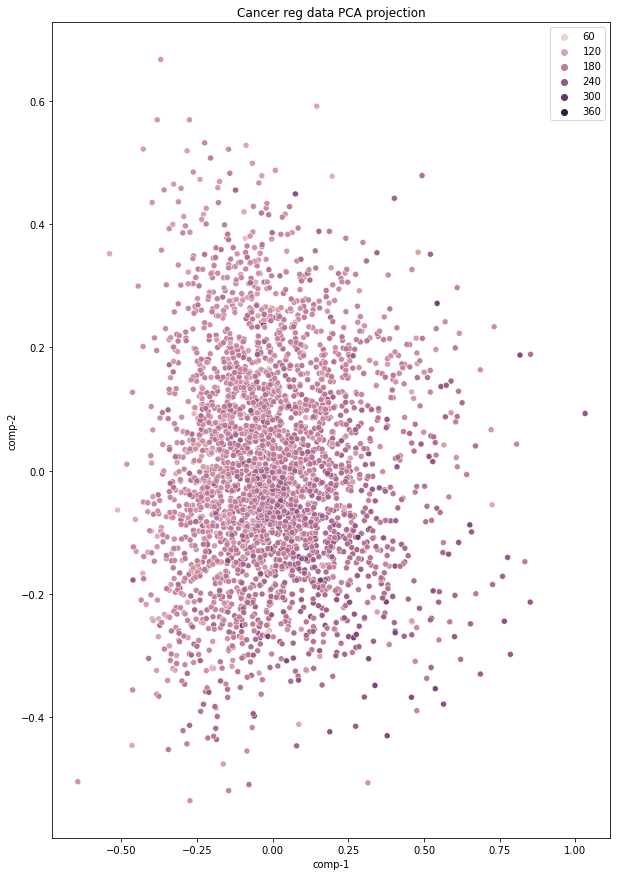

In [ ]:
import seaborn as sns

df_pca = pd.DataFrame()
df_pca["y"] = y
df_pca["comp-1"] = skl_pca[:,0]
df_pca["comp-2"] = skl_pca[:,1]

plt.figure(figsize=(10,15))
sns.scatterplot(x="comp-1", y="comp-2", hue=df_pca.y.tolist(),
                data=df_pca).set(title="Cancer reg data PCA projection") 

# t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3047 samples in 0.006s...
[t-SNE] Computed neighbors for 3047 samples in 0.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3047
[t-SNE] Computed conditional probabilities for sample 2000 / 3047
[t-SNE] Computed conditional probabilities for sample 3000 / 3047
[t-SNE] Computed conditional probabilities for sample 3047 / 3047
[t-SNE] Mean sigma: 0.061116
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.287727
[t-SNE] KL divergence after 1000 iterations: 1.403848


Selanjutnya, kita akan memvisualisasikan hasilnya dalam sebuah plot.

[Text(0.5, 1.0, 'Cancer reg data T-SNE projection')]

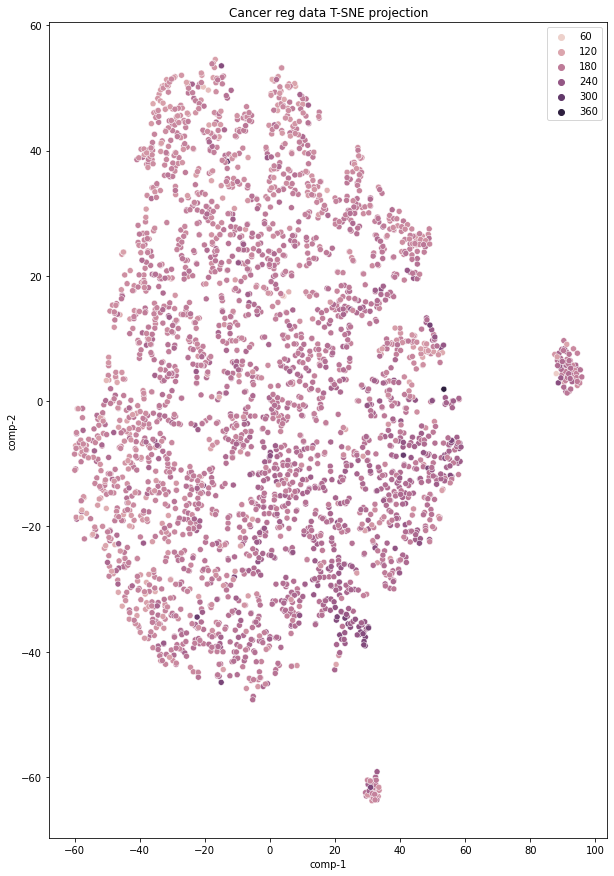

In [ ]:
import seaborn as sns

df_tsne = pd.DataFrame()
df_tsne["y"] = y
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]

plt.figure(figsize=(10,15))
sns.scatterplot(x="comp-1", y="comp-2", hue=df_tsne.y.tolist(),
                data=df_tsne).set(title="Cancer reg data T-SNE projection") 